In [4]:
# Titanic Data Cleaning & Preprocessing - Internship Task 1

# ====================
# 1. IMPORT LIBRARIES
# ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer

sns.set(style="whitegrid")
import seaborn as sns
sns.set_theme()  # Modern seaborn theme setup


In [5]:
# =======================
# 2. LOAD & EXPLORE DATA
# =======================
df = pd.read_csv('Titanic-Dataset.csv')  

# Basic exploration
print("Dataset Shape:", df.shape)
display(df.head())
display(df.info())
display(df.describe())
display(df.isnull().sum())


Dataset Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# ========================
# 3. HANDLE MISSING VALUES
# ========================
# Numerical: Use median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Categorical: Use mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop columns with too many missing values (if any)
# df.drop(columns=['Cabin'], inplace=True)

C:\Users\PUSHTI\AppData\Local\Temp\ipykernel_17664\1484414700.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\PUSHTI\AppData\Local\Temp\ipykernel_17664\1484414700.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [7]:
# ================================
# 4. ENCODING CATEGORICAL FEATURES
# ================================
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Optional: Label encode 'Pclass' if needed
# le = LabelEncoder()
# df['Pclass'] = le.fit_transform(df['Pclass'])


In [8]:
# =======================
# 5. FEATURE SCALING
# =======================
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


In [9]:
# =======================
# 6. OUTLIER DETECTION
# =======================
# Using IQR method for 'Fare'
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Fare'] >= Q1 - 1.5 * IQR) & (df['Fare'] <= Q3 + 1.5 * IQR)]


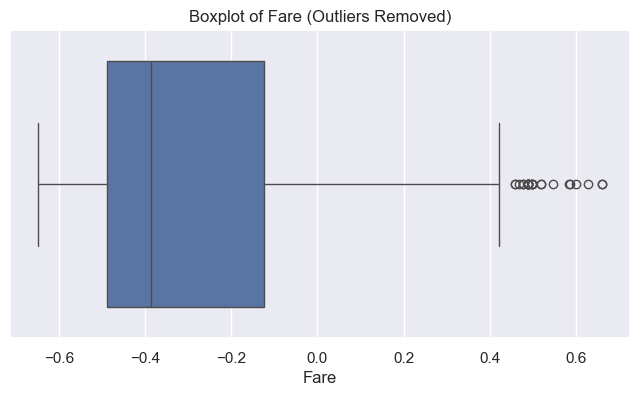

In [10]:
# Boxplot visualization
plt.figure(figsize=(8,4))
sns.boxplot(x='Fare', data=df)
plt.title("Boxplot of Fare (Outliers Removed)")
plt.show()

In [11]:
# =======================
# 7. EXPORT CLEANED DATA
# =======================
df.to_csv('titanic_cleaned.csv', index=False)
print("Cleaned dataset saved.")

Cleaned dataset saved.


In [12]:
# =======================
# 8.DATA CHECK
# =======================
display(df.head())
display(df.describe())
display(df.info())

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",-0.565736,1,0,A/5 21171,-0.502445,NaN,True,False,True
2,3,1,3,"Heikkinen, Miss. Laina",-0.258337,0,0,STON/O2. 3101282,-0.488854,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.433312,1,0,113803,0.420730,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0.433312,0,0,373450,-0.486337,NaN,True,False,True
5,6,0,3,"Moran, Mr. James",-0.104637,0,0,330877,-0.478116,NaN,True,True,False


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,775.000000,775.000000,775.00000,775.000000,775.000000,775.000000,775.000000
mean,445.806452,0.339355,2.48000,-0.047099,0.437419,0.340645,-0.289579
std,260.116285,0.473796,0.73439,0.982304,0.899838,0.785914,0.273391
min,1.000000,0.000000,1.00000,-2.224156,0.000000,0.000000,-0.648422
25%,213.500000,0.000000,2.00000,-0.565736,0.000000,0.000000,-0.489442
50%,450.000000,0.000000,3.00000,-0.104637,0.000000,0.000000,-0.386671
75%,670.500000,1.000000,3.00000,0.356462,1.000000,0.000000,-0.124920
max,891.000000,1.000000,3.00000,3.891554,5.000000,6.000000,0.660333


<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  775 non-null    int64  
 1   Survived     775 non-null    int64  
 2   Pclass       775 non-null    int64  
 3   Name         775 non-null    object 
 4   Age          775 non-null    float64
 5   SibSp        775 non-null    int64  
 6   Parch        775 non-null    int64  
 7   Ticket       775 non-null    object 
 8   Fare         775 non-null    float64
 9   Cabin        114 non-null    object 
 10  Sex_male     775 non-null    bool   
 11  Embarked_Q   775 non-null    bool   
 12  Embarked_S   775 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(3)
memory usage: 68.9+ KB


None